In [558]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go 
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [559]:
state_abbreviations = {
'Alabama': 'AL',
'Alaska': 'AK',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'District of Columbia': 'DC',
'Florida': 'FL',
'Georgia': 'GA',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY',
'Puerto Rico': 'PR'
}

In [560]:
df = pd.DataFrame()

df = pd.read_excel('../Unused_Data/ML_data.xlsx')

In [561]:
df['Code'] = df['State'].map(state_abbreviations)

In [562]:
df.head()

,State,Year,Births,Household Size,Mortgage Median (dollars),Median household income (dollars),Monthly Housing Cost Median (dollars),Real Estate Tax Median (dollars),Price,Region_Id,Occupied housing units,Code
0,Alabama,2022,61506,2.45,236000,91415,1293,842,217839.322432,4,2016448,AL
1,Alaska,2022,10125,2.56,357600,118096,2019,4039,347077.670030,3,274574,AK
2,Arizona,2022,86548,2.53,435200,102270,1616,1873,429046.262883,8,2850377,AZ
3,Arkansas,2022,39688,2.44,211200,85764,1216,1183,193731.856242,6,1216207,AR
4,California,2022,453850,2.82,738000,134629,2673,5479,740517.234468,9,13550586,CA


In [497]:
print(df.isnull().sum())

State                                    0
Year                                     0
Births                                   0
Household Size                           0
Mortgage Median (dollars)                0
Median household income (dollars)        0
Monthly Housing Cost Median (dollars)    0
Real Estate Tax Median (dollars)         0
Price                                    0
Region_Id                                0
Occupied housing units                   0
Code                                     0
dtype: int64


In [498]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,612.0,2.015667e+03,3.707382e+00,2010.000000,2012.750000,2.015500e+03,2.018250e+03,2.022000e+03
Births,612.0,7.835533e+04,8.947249e+04,5068.000000,21210.750000,5.549050e+04,9.060125e+04,5.187220e+05
Household Size,612.0,2.557010e+00,1.710535e-01,1.940000,2.450000,2.530000e+00,2.640000e+00,3.190000e+00
Mortgage Median (dollars),612.0,2.441672e+05,1.138568e+05,116000.000000,162775.000000,2.140000e+05,2.833750e+05,8.457000e+05
Median household income (dollars),612.0,8.670536e+04,1.774646e+04,56878.000000,72879.500000,8.372550e+04,9.709900e+04,1.711050e+05
Monthly Housing Cost Median (dollars),612.0,1.516435e+03,3.803817e+02,918.000000,1224.750000,1.410500e+03,1.740250e+03,2.893000e+03
Real Estate Tax Median (dollars),612.0,2.560083e+03,1.516767e+03,568.000000,1438.500000,2.168500e+03,3.304250e+03,9.085000e+03
Price,612.0,2.296278e+05,1.135953e+05,91327.638005,148850.046861,2.038928e+05,2.703611e+05,8.397226e+05
Region_Id,612.0,3.313725e+01,1.710430e+01,3.000000,19.000000,3.400000e+01,4.700000e+01,6.200000e+01
Occupied housing units,612.0,2.349590e+06,2.491425e+06,222539.000000,651961.750000,1.714131e+06,2.777240e+06,1.355059e+07


In [499]:
fig = px.histogram(df, x="Price", title='Histogram of Home Prices', opacity=0.7)
fig.update_layout(bargap=0.2)
fig.show()

In [500]:
print(df.corr(numeric_only=True)['Price'].sort_values())

Region_Id                               -0.147874
Births                                   0.096822
Occupied housing units                   0.112022
Household Size                           0.153442
Real Estate Tax Median (dollars)         0.423262
Year                                     0.454787
Median household income (dollars)        0.824289
Monthly Housing Cost Median (dollars)    0.836736
Mortgage Median (dollars)                0.984322
Price                                    1.000000
Name: Price, dtype: float64


In [501]:
fig = px.imshow(df.corr(numeric_only=True),text_auto=True,aspect="auto")
fig.show()

In [502]:
fig = px.scatter(df, x='Price', y='Mortgage Median (dollars)')
fig.show()

In [503]:
fig = px.box(df, x='Code',y='Price')
fig.show()

In [504]:
df.head()

,State,Year,Births,Household Size,Mortgage Median (dollars),Median household income (dollars),Monthly Housing Cost Median (dollars),Real Estate Tax Median (dollars),Price,Region_Id,Occupied housing units,Code
0,Alabama,2022,61506,2.45,236000,91415,1293,842,217839.322432,4,2016448,AL
1,Alaska,2022,10125,2.56,357600,118096,2019,4039,347077.670030,3,274574,AK
2,Arizona,2022,86548,2.53,435200,102270,1616,1873,429046.262883,8,2850377,AZ
3,Arkansas,2022,39688,2.44,211200,85764,1216,1183,193731.856242,6,1216207,AR
4,California,2022,453850,2.82,738000,134629,2673,5479,740517.234468,9,13550586,CA


In [505]:
mean_2022 = df[df['Year']==2022].groupby('Code').mean(numeric_only=True)['Price']

In [506]:
fig = px.bar(mean_2022, y='Price',title='Mean Home Prices per Zillow Estimate 2022')
fig.show()

In [507]:
df.head()

,State,Year,Births,Household Size,Mortgage Median (dollars),Median household income (dollars),Monthly Housing Cost Median (dollars),Real Estate Tax Median (dollars),Price,Region_Id,Occupied housing units,Code
0,Alabama,2022,61506,2.45,236000,91415,1293,842,217839.322432,4,2016448,AL
1,Alaska,2022,10125,2.56,357600,118096,2019,4039,347077.670030,3,274574,AK
2,Arizona,2022,86548,2.53,435200,102270,1616,1873,429046.262883,8,2850377,AZ
3,Arkansas,2022,39688,2.44,211200,85764,1216,1183,193731.856242,6,1216207,AR
4,California,2022,453850,2.82,738000,134629,2673,5479,740517.234468,9,13550586,CA


In [508]:
df.drop('State',axis=1,inplace=True)

In [509]:
df.head()

,Year,Births,Household Size,Mortgage Median (dollars),Median household income (dollars),Monthly Housing Cost Median (dollars),Real Estate Tax Median (dollars),Price,Region_Id,Occupied housing units,Code
0,2022,61506,2.45,236000,91415,1293,842,217839.322432,4,2016448,AL
1,2022,10125,2.56,357600,118096,2019,4039,347077.670030,3,274574,AK
2,2022,86548,2.53,435200,102270,1616,1873,429046.262883,8,2850377,AZ
3,2022,39688,2.44,211200,85764,1216,1183,193731.856242,6,1216207,AR
4,2022,453850,2.82,738000,134629,2673,5479,740517.234468,9,13550586,CA


In [510]:
df.drop('Code',inplace=True,axis=1)

In [511]:
df.head()

,Year,Births,Household Size,Mortgage Median (dollars),Median household income (dollars),Monthly Housing Cost Median (dollars),Real Estate Tax Median (dollars),Price,Region_Id,Occupied housing units
0,2022,61506,2.45,236000,91415,1293,842,217839.322432,4,2016448
1,2022,10125,2.56,357600,118096,2019,4039,347077.670030,3,274574
2,2022,86548,2.53,435200,102270,1616,1873,429046.262883,8,2850377
3,2022,39688,2.44,211200,85764,1216,1183,193731.856242,6,1216207
4,2022,453850,2.82,738000,134629,2673,5479,740517.234468,9,13550586


In [512]:
X = df.drop('Price',axis=1).values
y = df['Price'].values

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [514]:
scaler = MinMaxScaler()

In [515]:
X_train = scaler.fit_transform(X_train)

In [516]:
X_test = scaler.transform(X_test)

In [517]:
print(X_train.shape)

(459, 9)


In [518]:
model = keras.Sequential()

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1)) #predict the price

model.compile(optimizer='adam',loss='mse')

In [519]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [520]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), epochs=360, callbacks=[early_stop])

Epoch 1/360


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 54282727424.0000 - val_loss: 82736824320.0000
Epoch 2/360
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55844532224.0000 - val_loss: 82736807936.0000
Epoch 3/360
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60318154752.0000 - val_loss: 82736775168.0000
Epoch 4/360
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59176898560.0000 - val_loss: 82736742400.0000
Epoch 5/360
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61007675392.0000 - val_loss: 82736709632.0000
Epoch 6/360
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59817521152.0000 - val_loss: 82736652288.0000
Epoch 7/360
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58155999232.0000 - val_loss: 82736570368.0000
Epoch 8/360
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60363186176.0000 - val_loss: 82736431104.0000
Epoch 9/360
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59161251840.0000 - val_loss: 82736160768.0000
Epoch 10/360
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 580556

In [521]:
losses = pd.DataFrame(model.history.history)

<Axes: >

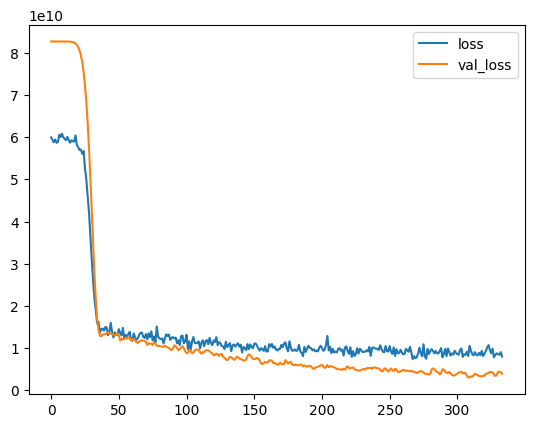

In [522]:
losses.plot()

In [523]:
fig = px.line(losses,title='Training Loss per Epoch vs Validation Data Loss per Epoch')
fig.show()

In [524]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [525]:
#Root mean square error
print(np.sqrt(mean_squared_error(y_test,predictions)))

63309.38558486218


In [526]:
#off by $46k - average absolute errors
print(mean_absolute_error(y_test,predictions))

44899.596238910126


In [527]:
print(explained_variance_score(y_test,predictions))

0.8771078275843573


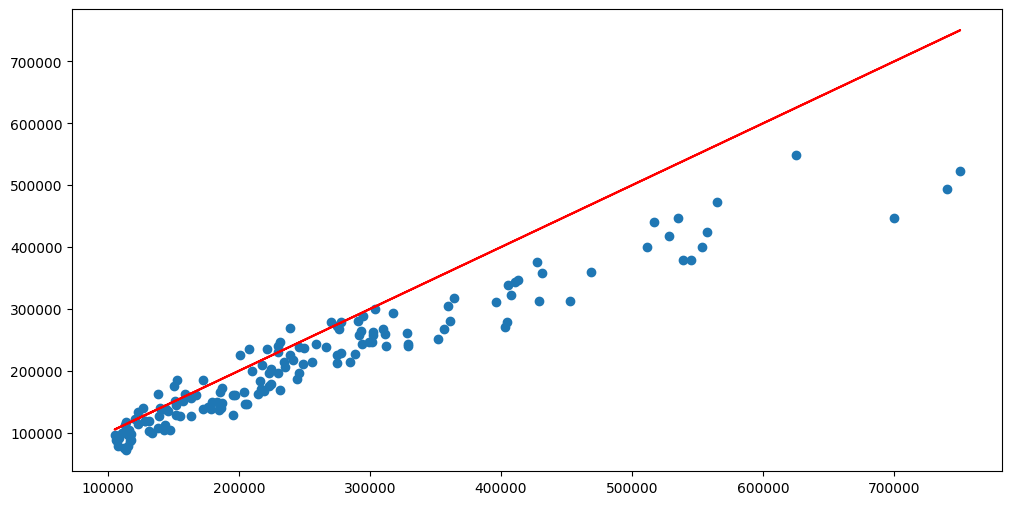

In [528]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [531]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
fig = px.scatter(df_pred, x='Actual', y='Predicted')
fig.add_trace(
    go.Scatter(
        x=df_pred['Actual'], 
        y=df_pred['Actual'], 
        mode='lines', 
        name='Perfect Prediction', 
        line=dict(color='red')
    )
)
fig.show()

In [548]:
data = df[(df['Region_Id']==56) & (df['Year']==2022)]

In [549]:
data.head()

,Year,Births,Household Size,Mortgage Median (dollars),Median household income (dollars),Monthly Housing Cost Median (dollars),Real Estate Tax Median (dollars),Price,Region_Id,Occupied housing units
46,2022,104539,2.5,390400,121648,1919,2837,357778.697936,56,3380607


In [550]:
data = data.drop('Price',axis=1)

In [551]:
print(data.shape)

(1, 9)


In [536]:
data = scaler.transform(data.values.reshape(1,9))

In [537]:
print(model.predict(data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[330103.9]]


In [552]:
tx_data = df[(df['Region_Id']==54) & (df['Year']==2022)]

In [553]:
tx_data.head()

,Year,Births,Household Size,Mortgage Median (dollars),Median household income (dollars),Monthly Housing Cost Median (dollars),Real Estate Tax Median (dollars),Price,Region_Id,Occupied housing units
43,2022,420463,2.65,316200,111986,1904,5123,302107.850131,54,11087708


In [554]:
tx_data = tx_data.drop('Price',axis=1)

In [555]:
print(tx_data.shape)

(1, 9)


In [556]:
tx_data = scaler.transform(tx_data.values.reshape(1,9))

In [557]:
print(model.predict(tx_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[263747.25]]
